In [32]:
%run './model/multi_corpus.py'
%run './constants.py'

from itertools import accumulate
import operator

In [2]:
corpora = co_occurence_graphs()
Gs = {field_name: corpus['G'] for (field_name, corpus) in corpora.items()}
Dfs = {field_name: corpus['Df'] for (field_name, corpus) in corpora.items()}

Gender Studies Graph with 18375 nodes and 2362724 edges
Geometry Graph with 11881 nodes and 1119429 edges
Geophysics Graph with 21341 nodes and 3709723 edges
Economics Graph with 12780 nodes and 1347658 edges
Language & Linguistics Graph with 14771 nodes and 1955723 edges
Probability & Statistics Graph with 15127 nodes and 2272474 edges
Material Engineering Graph with 20958 nodes and 3361647 edges
Artificial Intelligence Graph with 15040 nodes and 2598151 edges
Sociology Graph with 16822 nodes and 2381323 edges
International Business Graph with 13395 nodes and 1955815 edges
Political Science Graph with 16461 nodes and 2126471 edges
Genetics & Genomics Graph with 22220 nodes and 3447289 edges
Immunology Graph with 22126 nodes and 3990841 edges
Human Resources & Organizations Graph with 14355 nodes and 2170039 edges
Ethnic & Cultural Studies Graph with 15986 nodes and 2037714 edges
Neurology Graph with 20501 nodes and 3662226 edges


In [20]:
communities = {}
community_lengths = {}
community_number = {}
for field_name, G in Gs.items():
    print(field_name)
    comms = nx.community.louvain_communities(G)
    communities[field_name] = comms
    community_lengths[field_name] = [len(comm) for comm in comms]
    community_number[field_name] = len(comms)

Gender Studies
Geometry
Geophysics
Economics
Language & Linguistics
Probability & Statistics
Material Engineering
Artificial Intelligence
Sociology
International Business
Political Science
Genetics & Genomics
Immunology
Human Resources & Organizations
Ethnic & Cultural Studies
Neurology


/var/folders/rz/n4jmlyh1355cy_wkn5gd00x40000gn/T/ipykernel_13881/3516336988.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


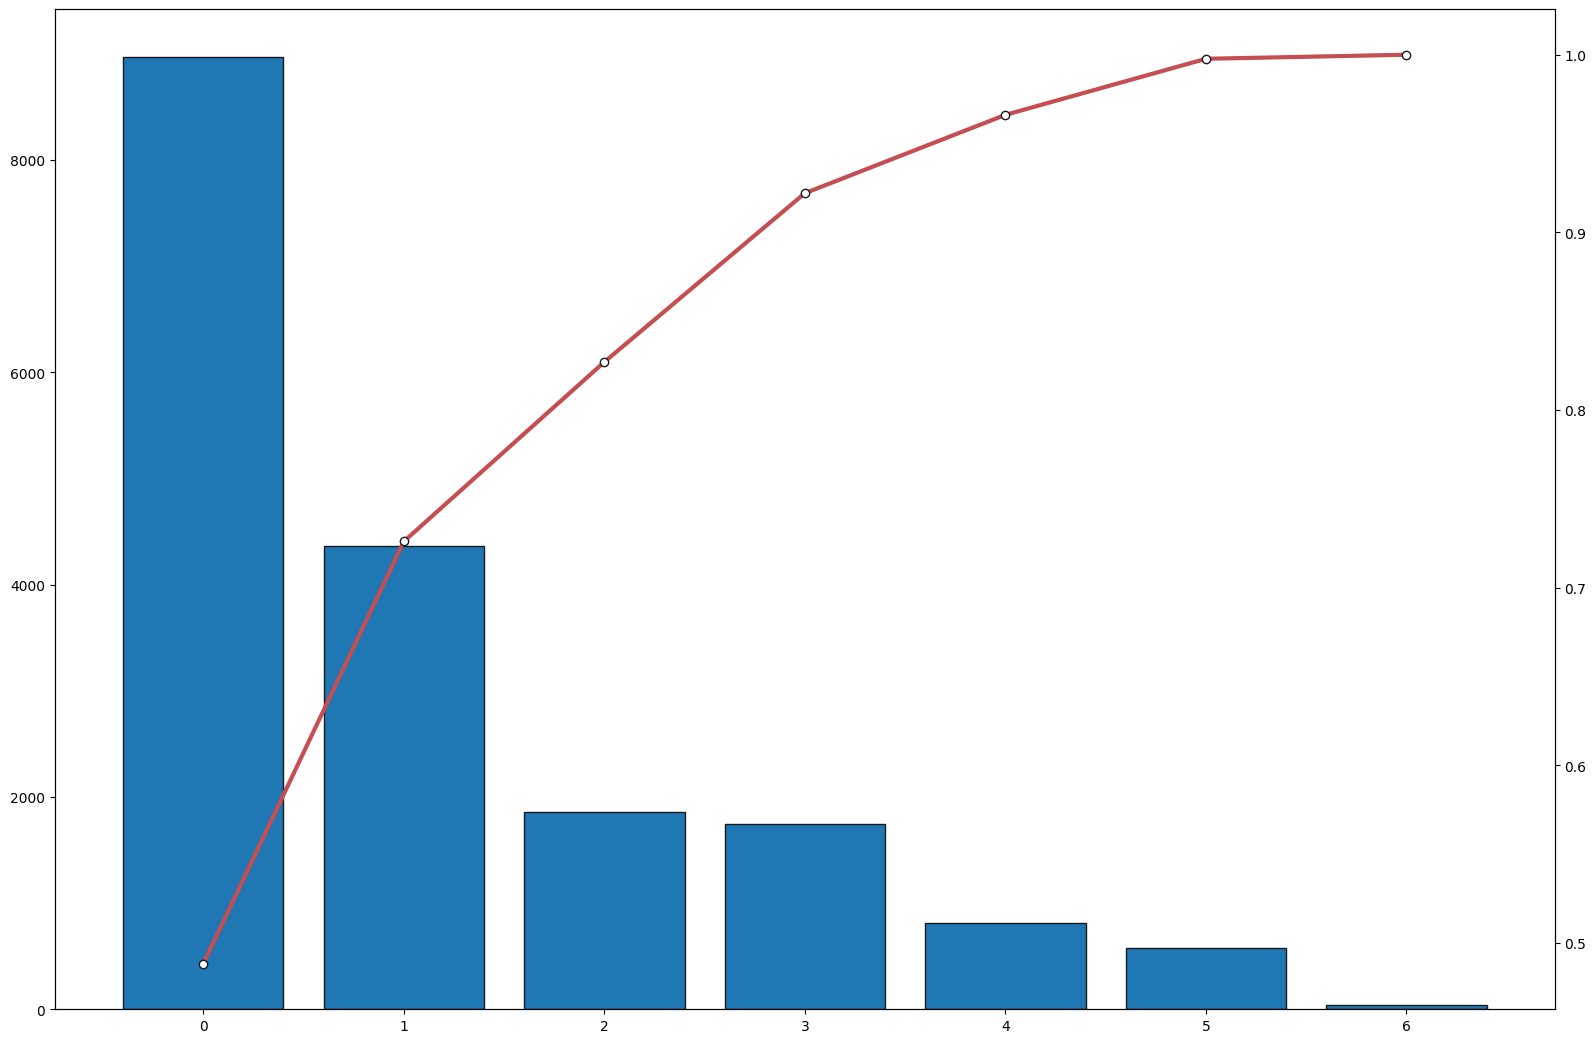

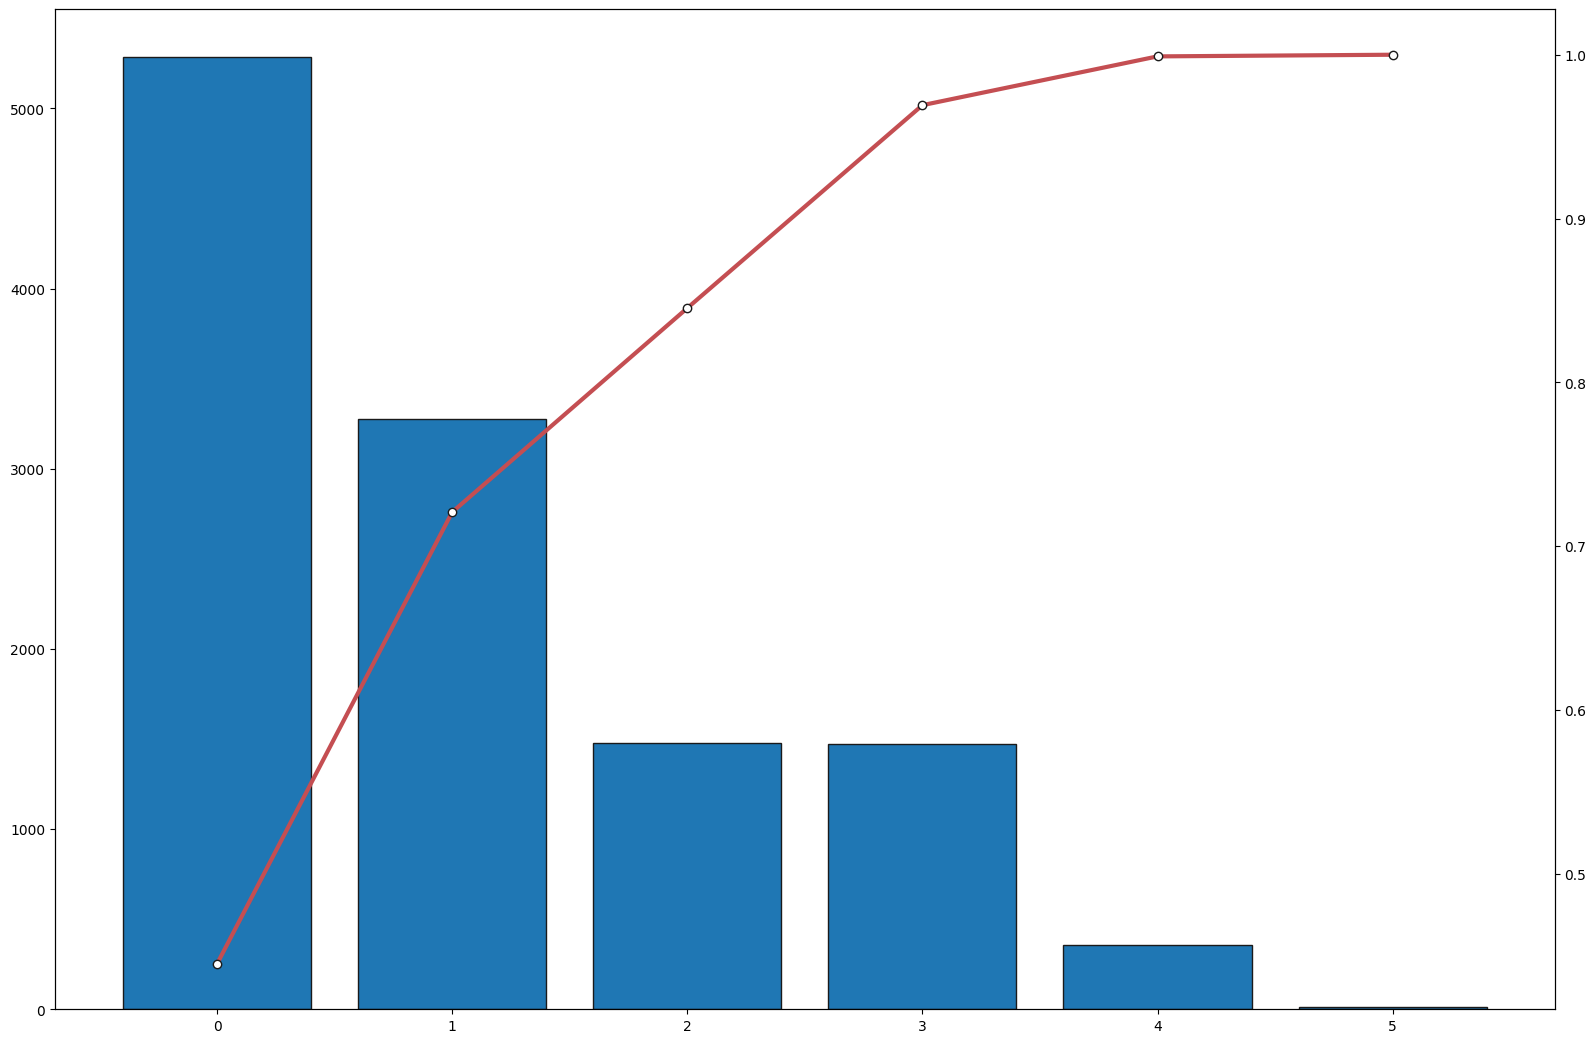

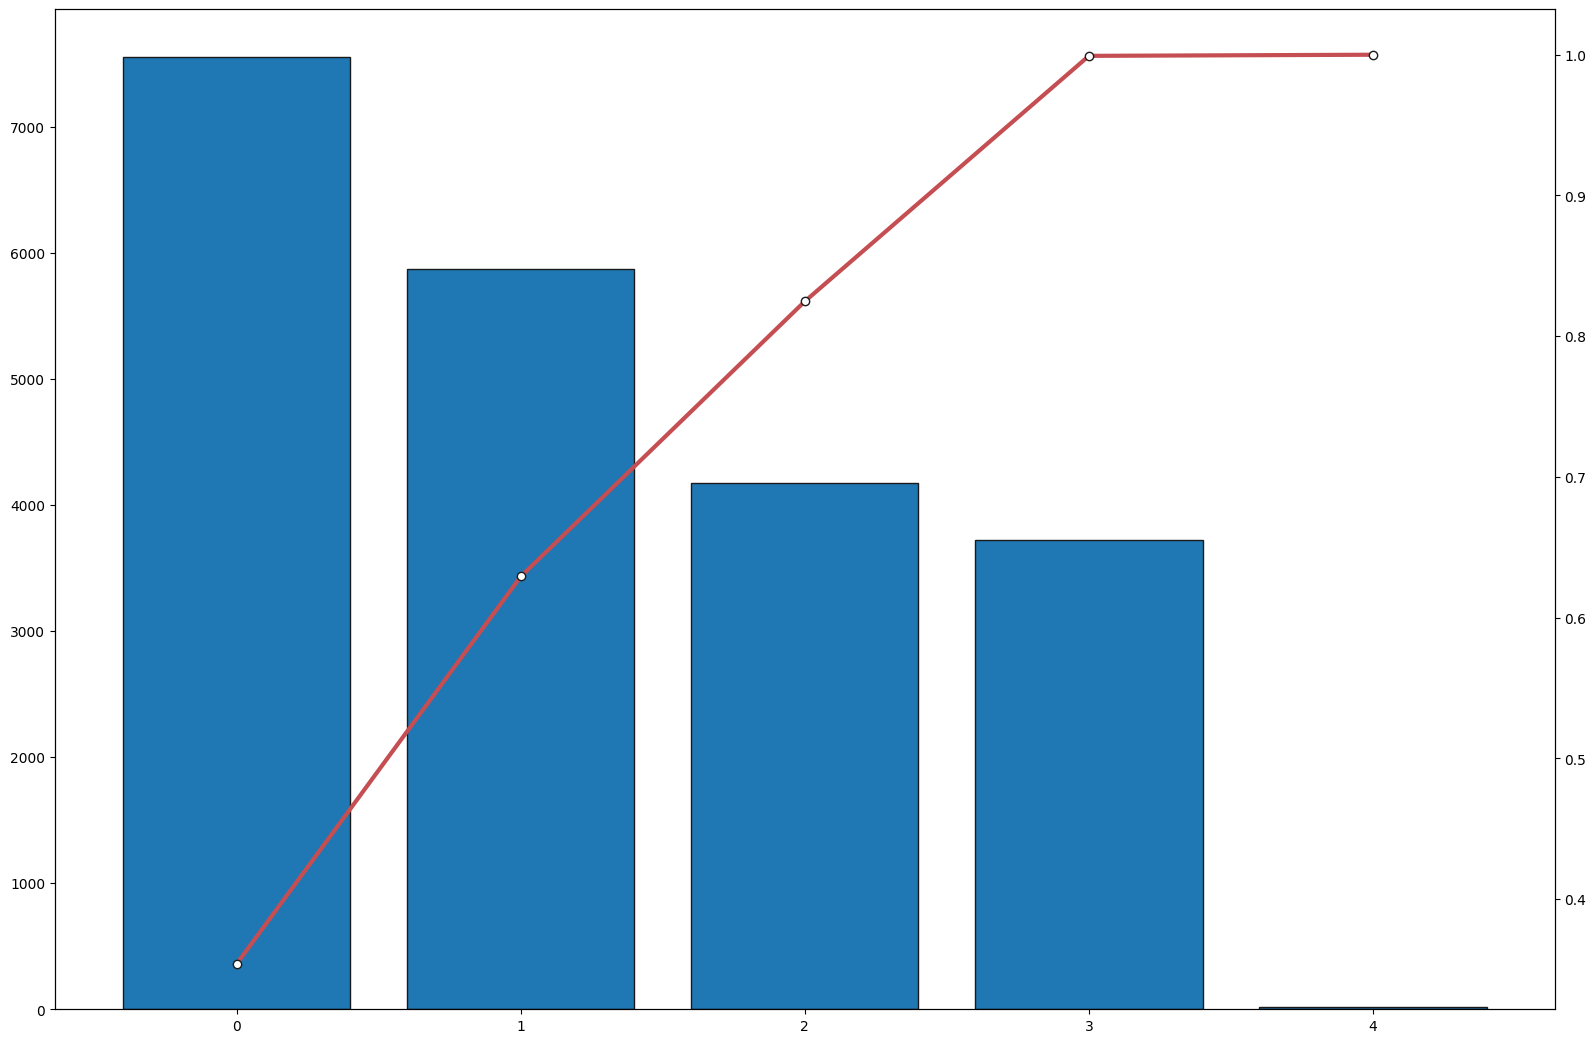

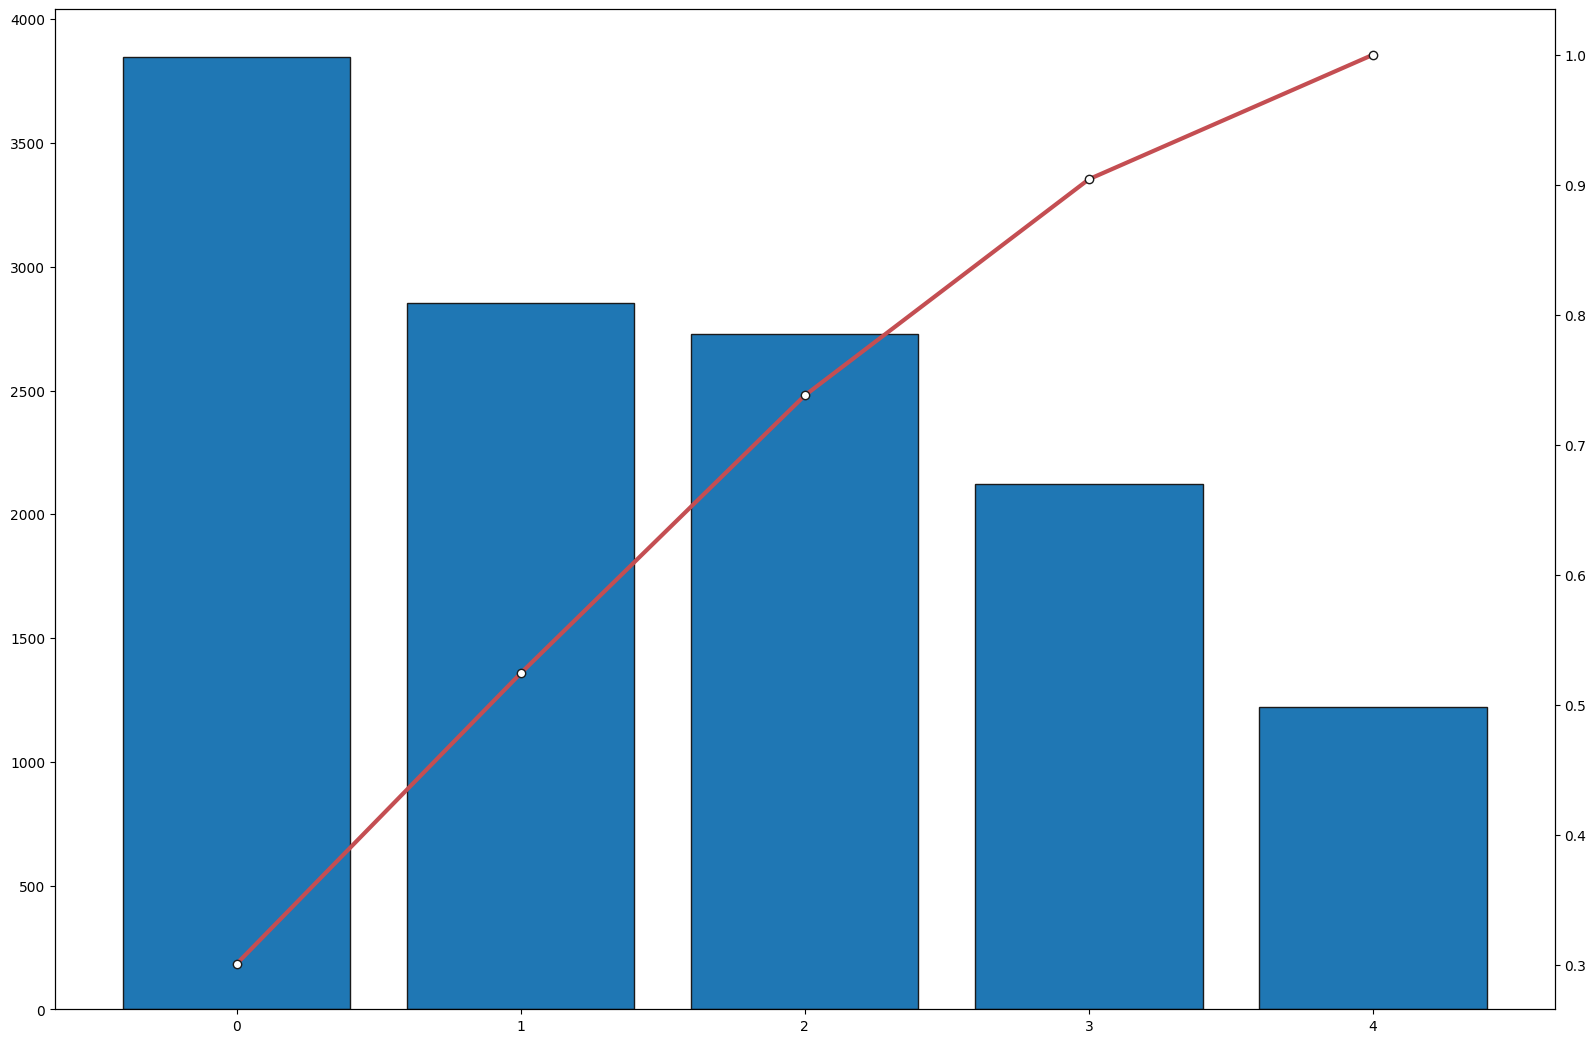

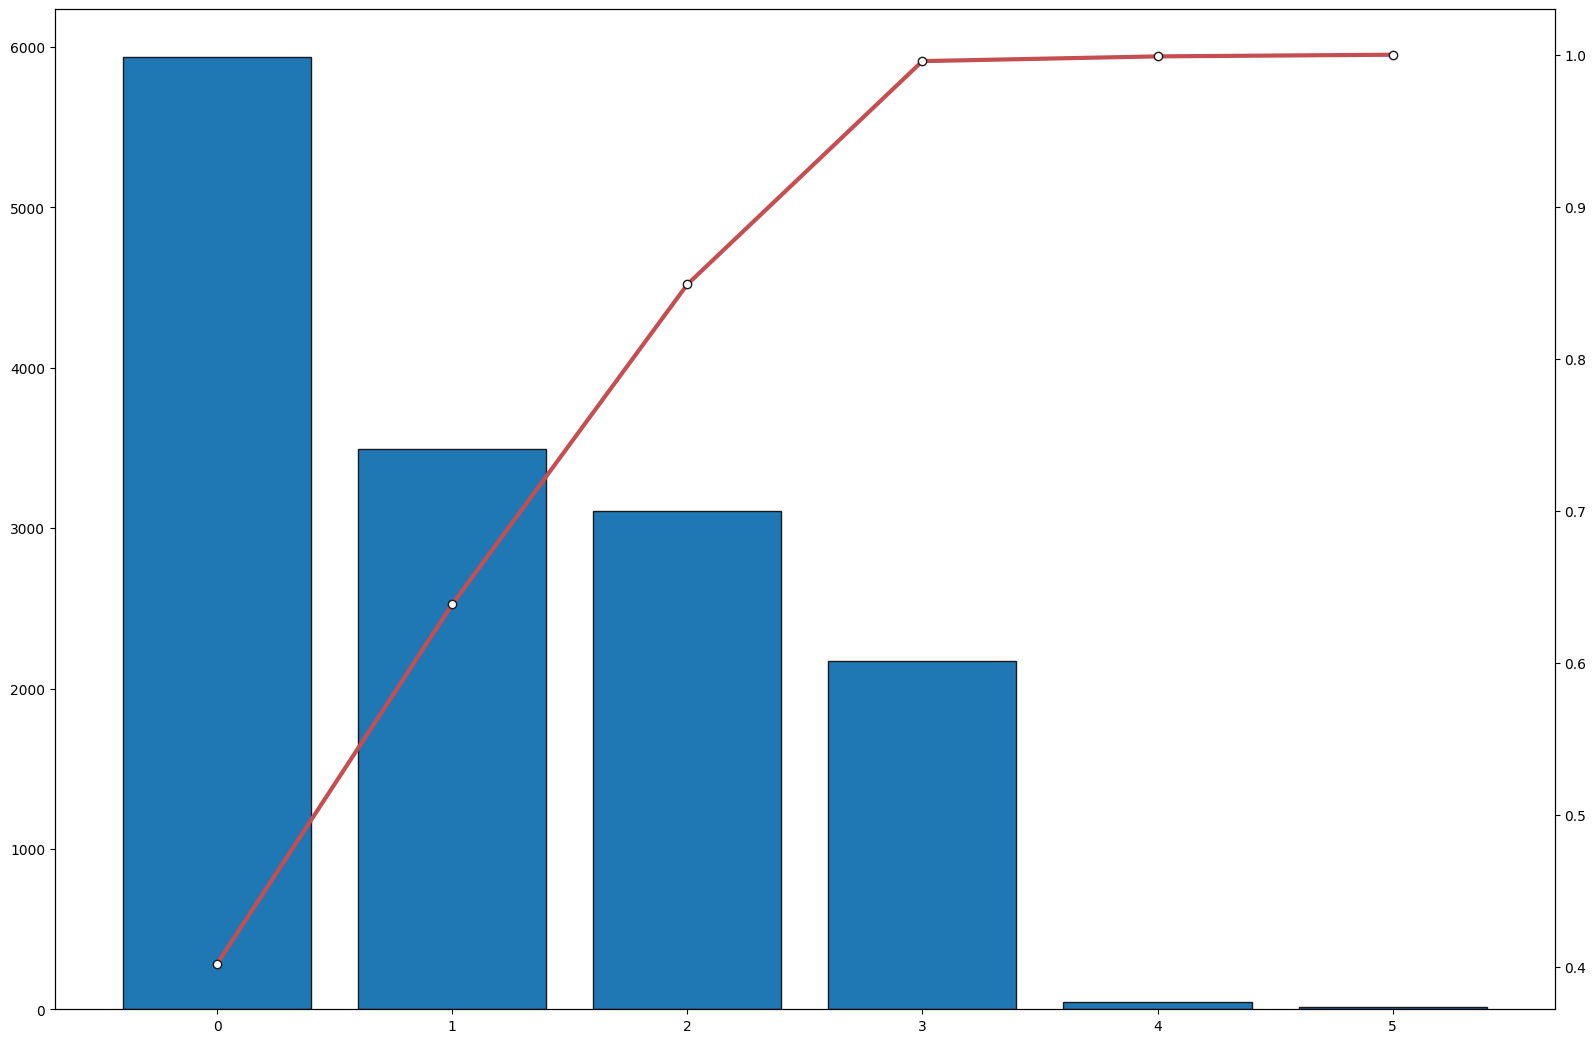

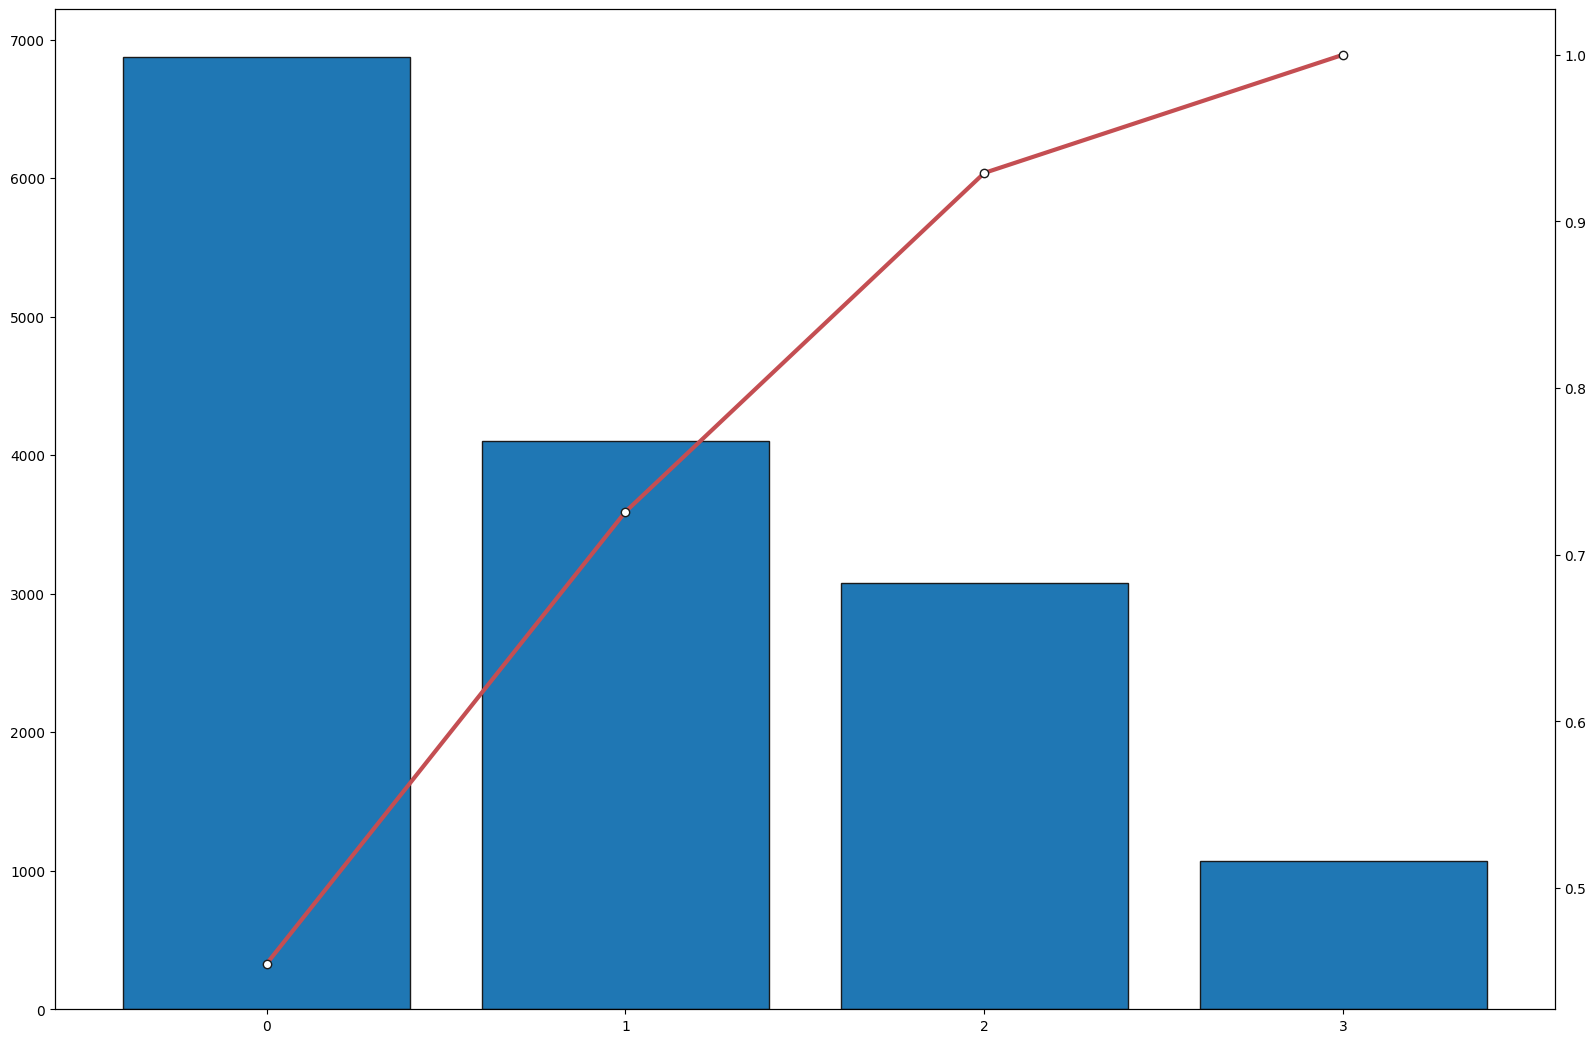

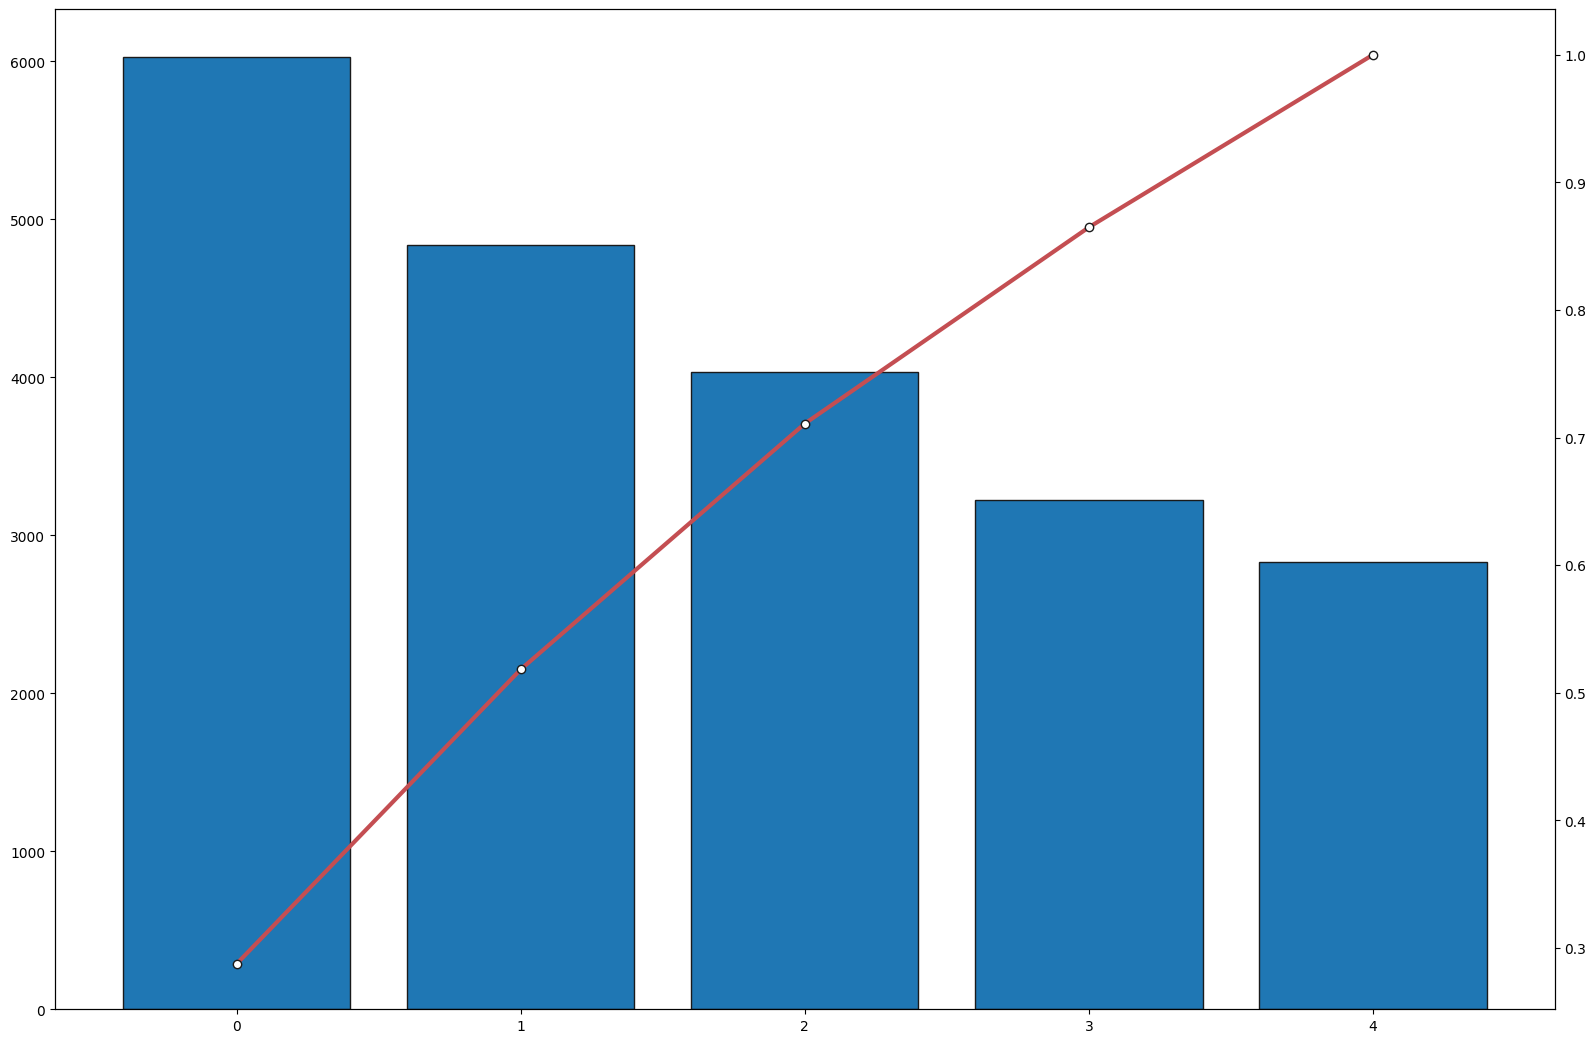

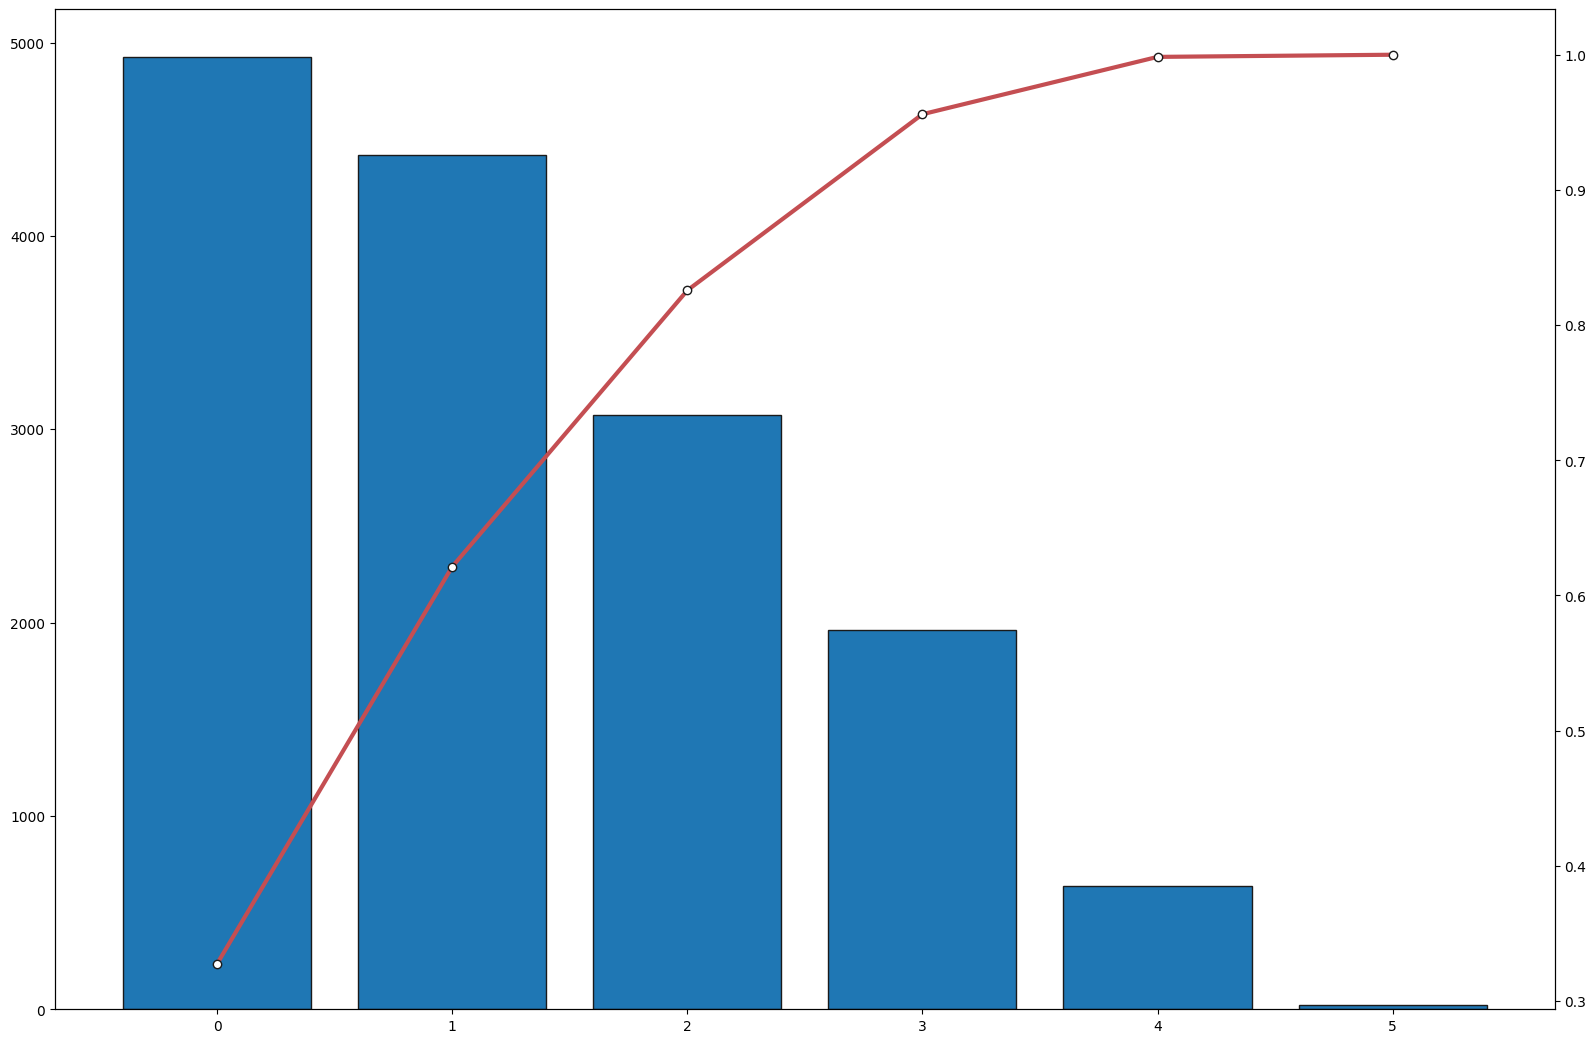

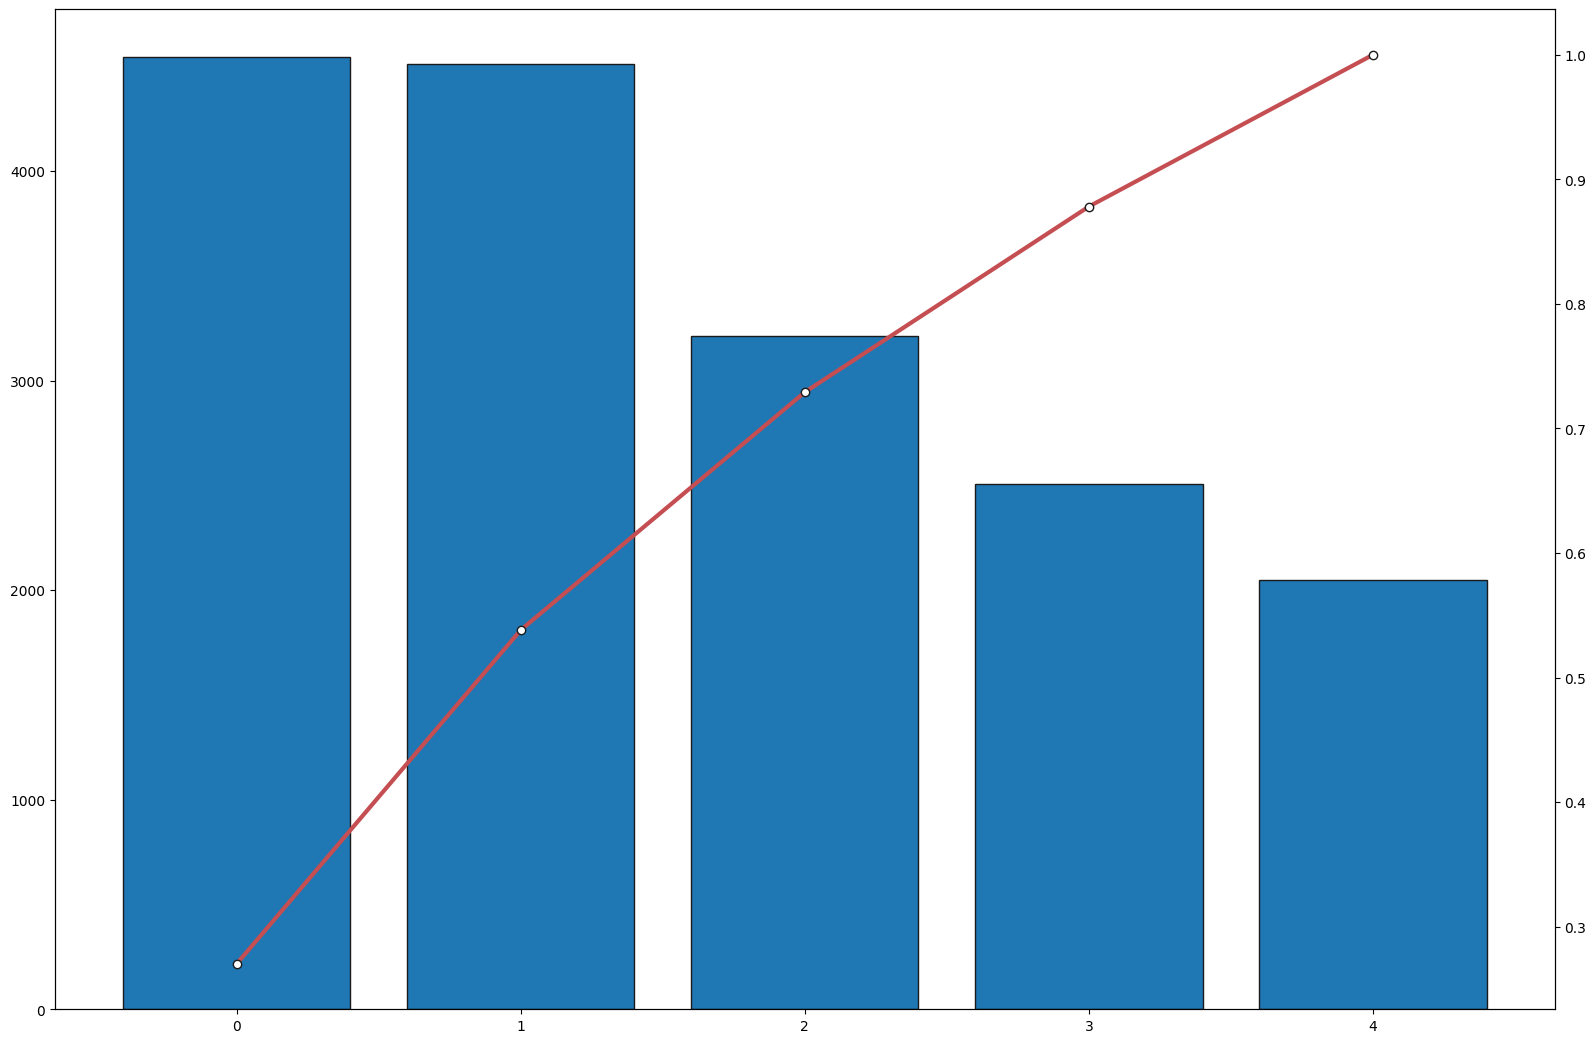

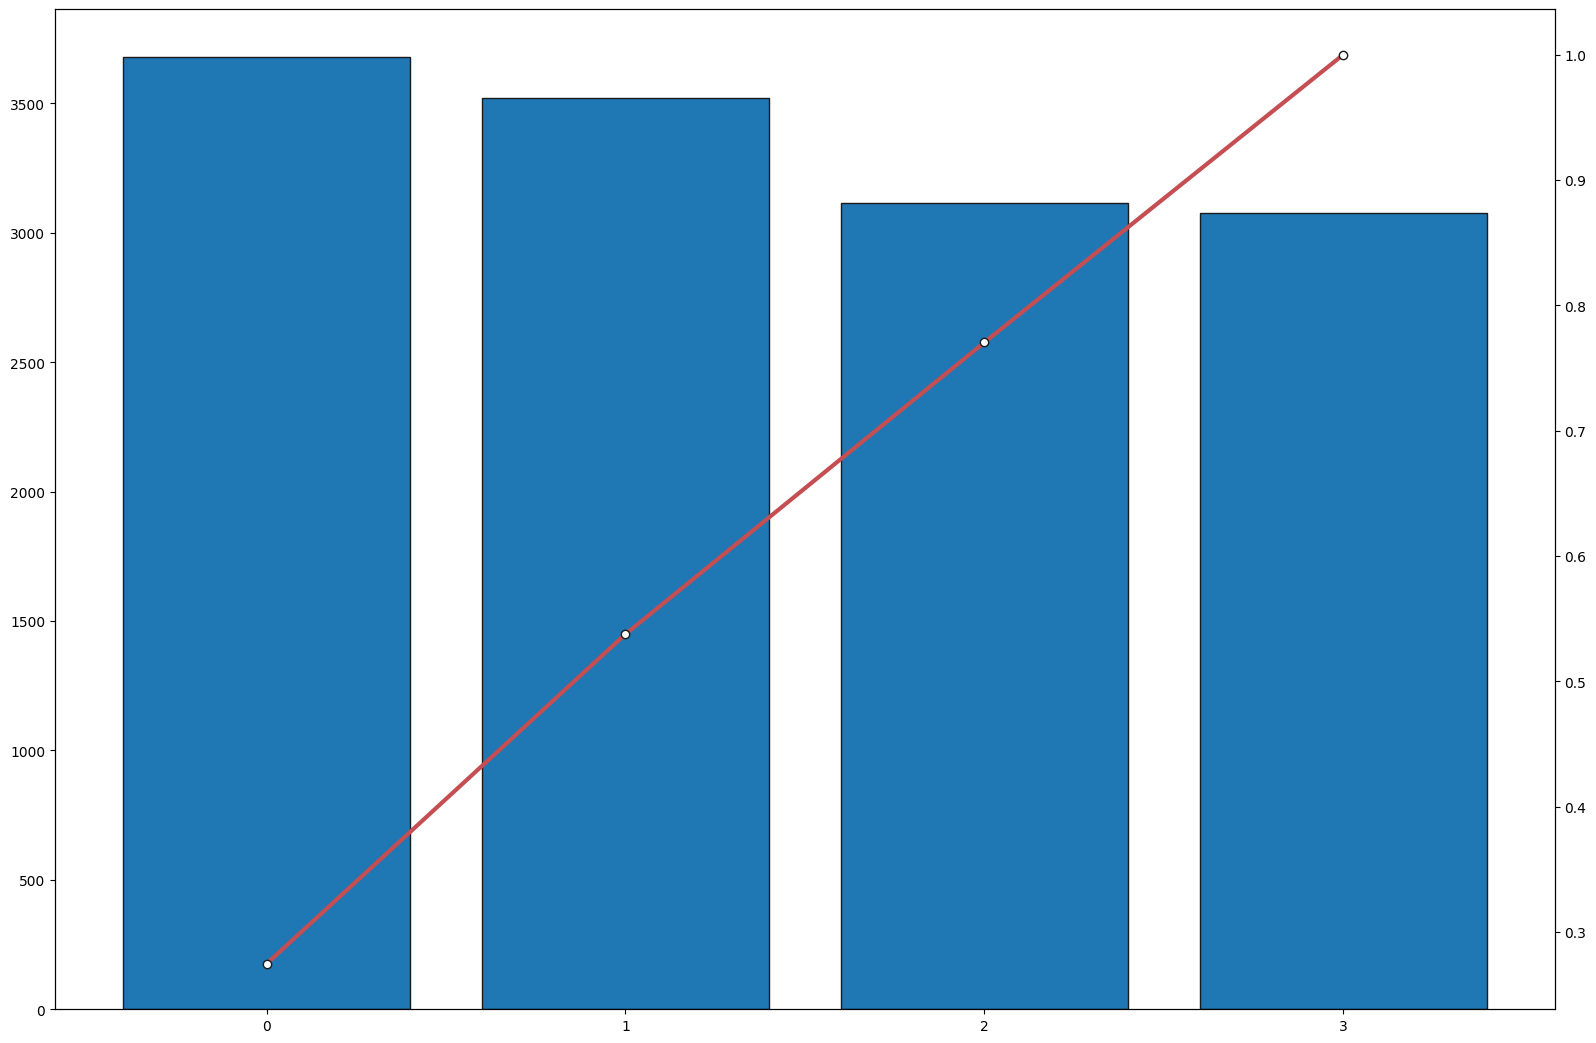

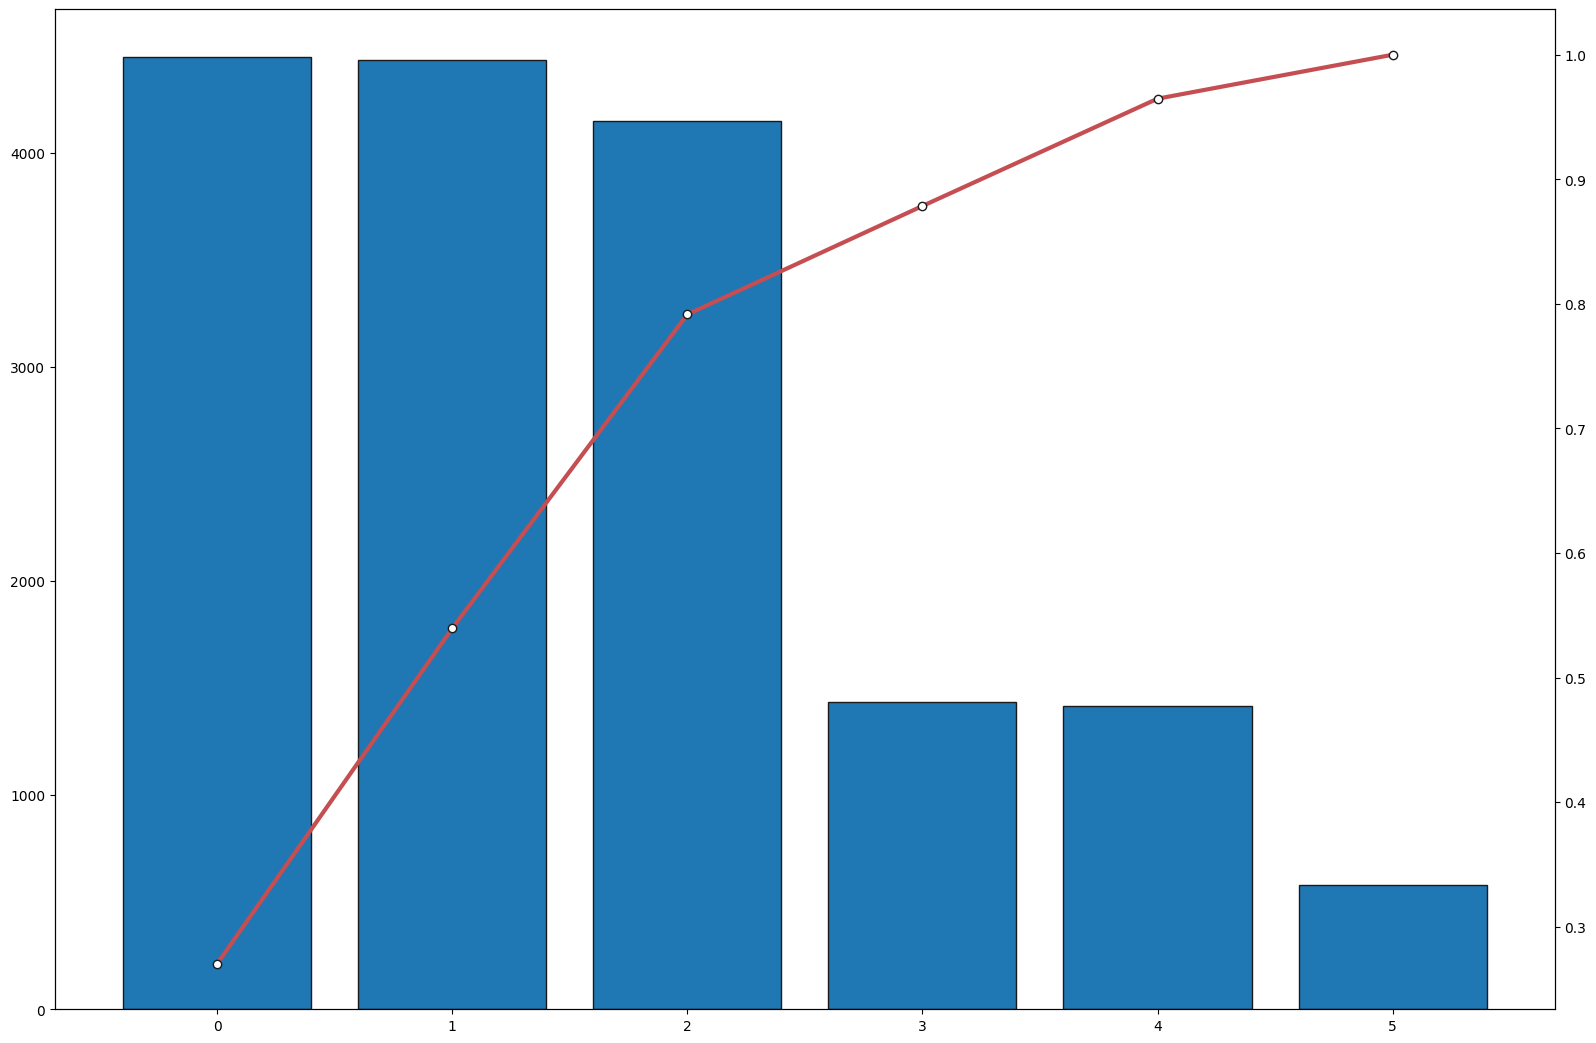

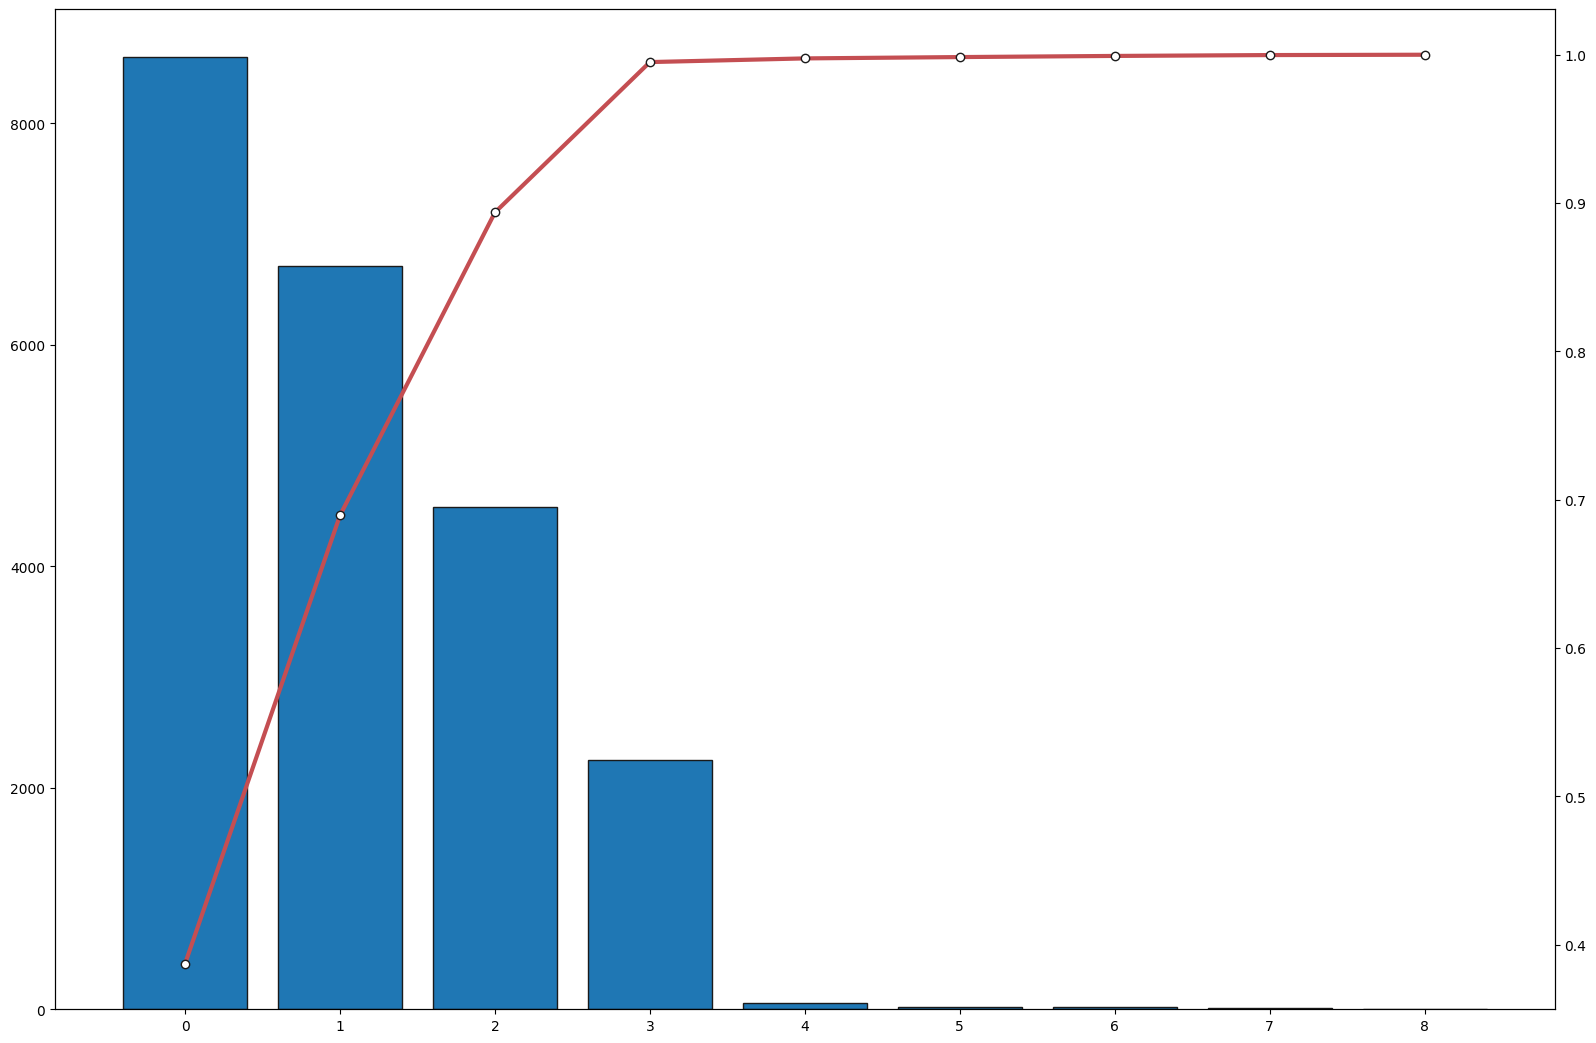

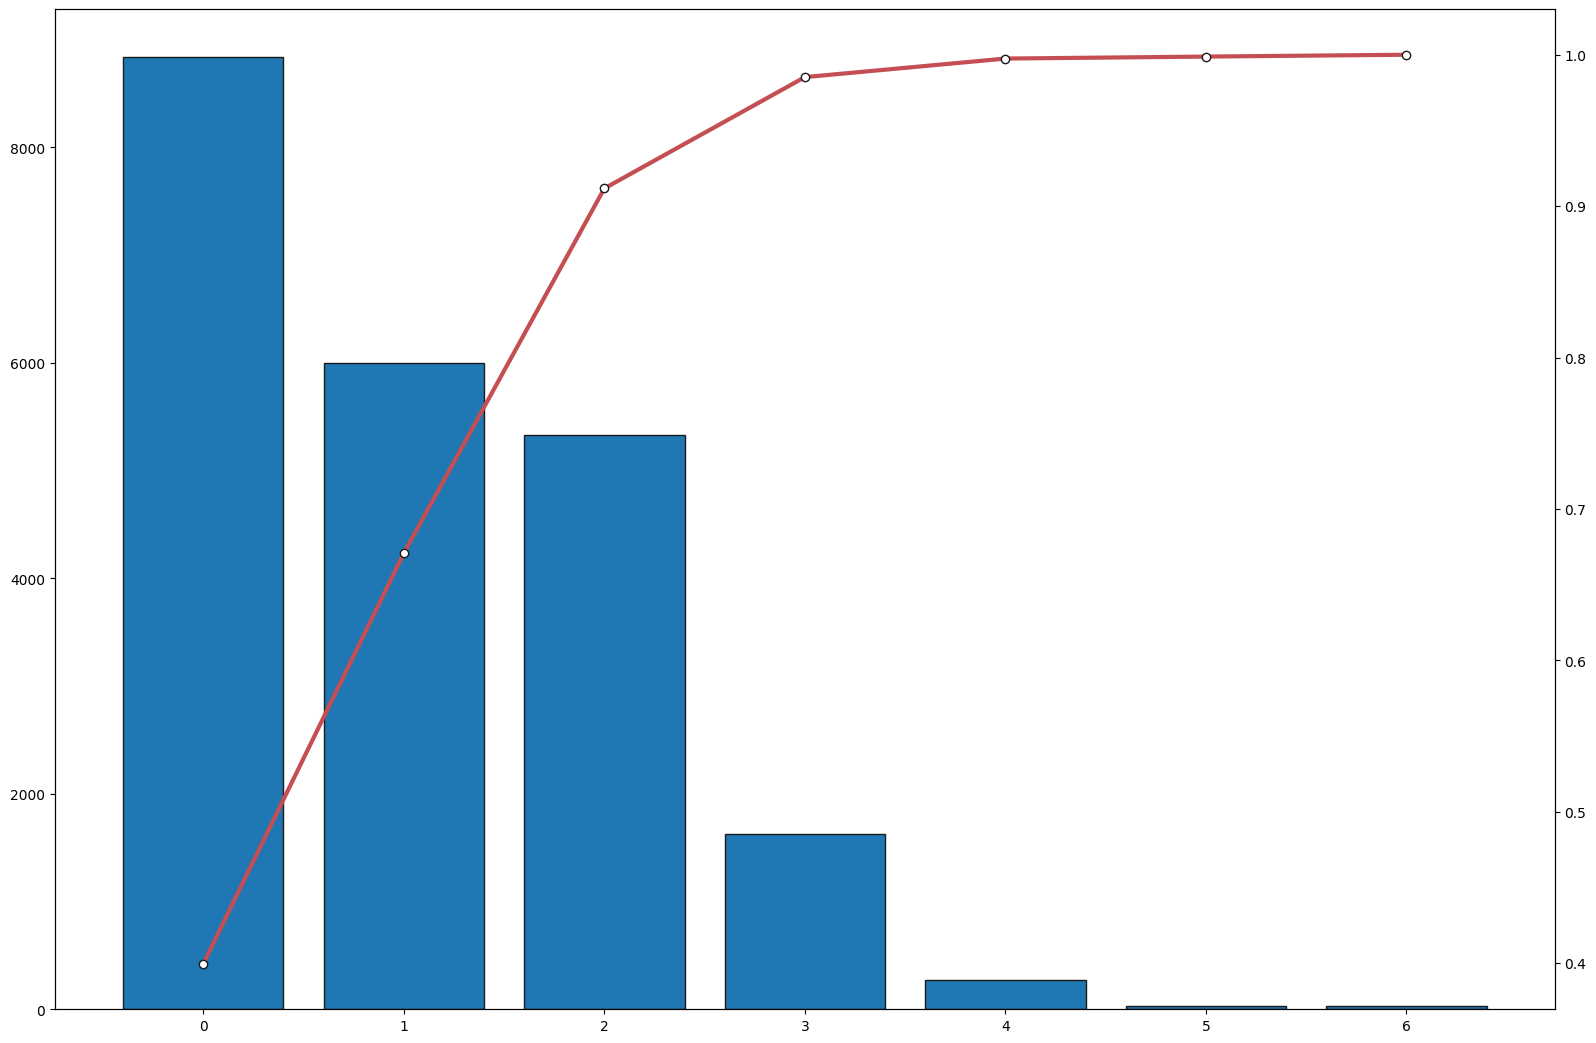

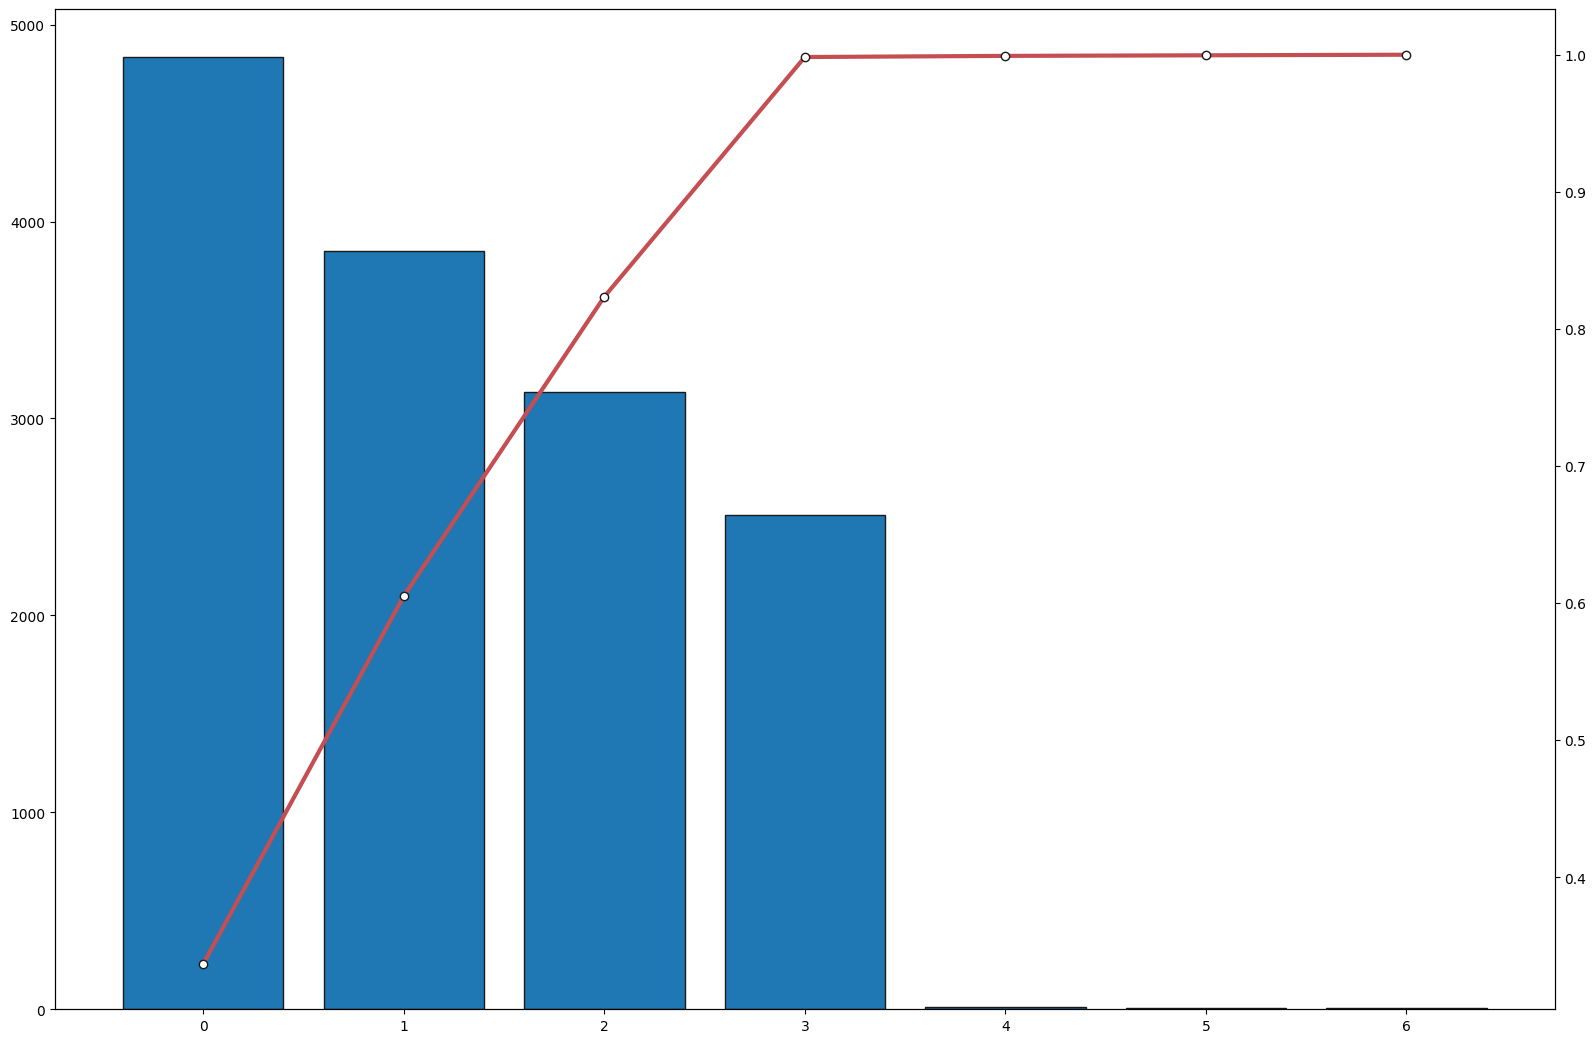

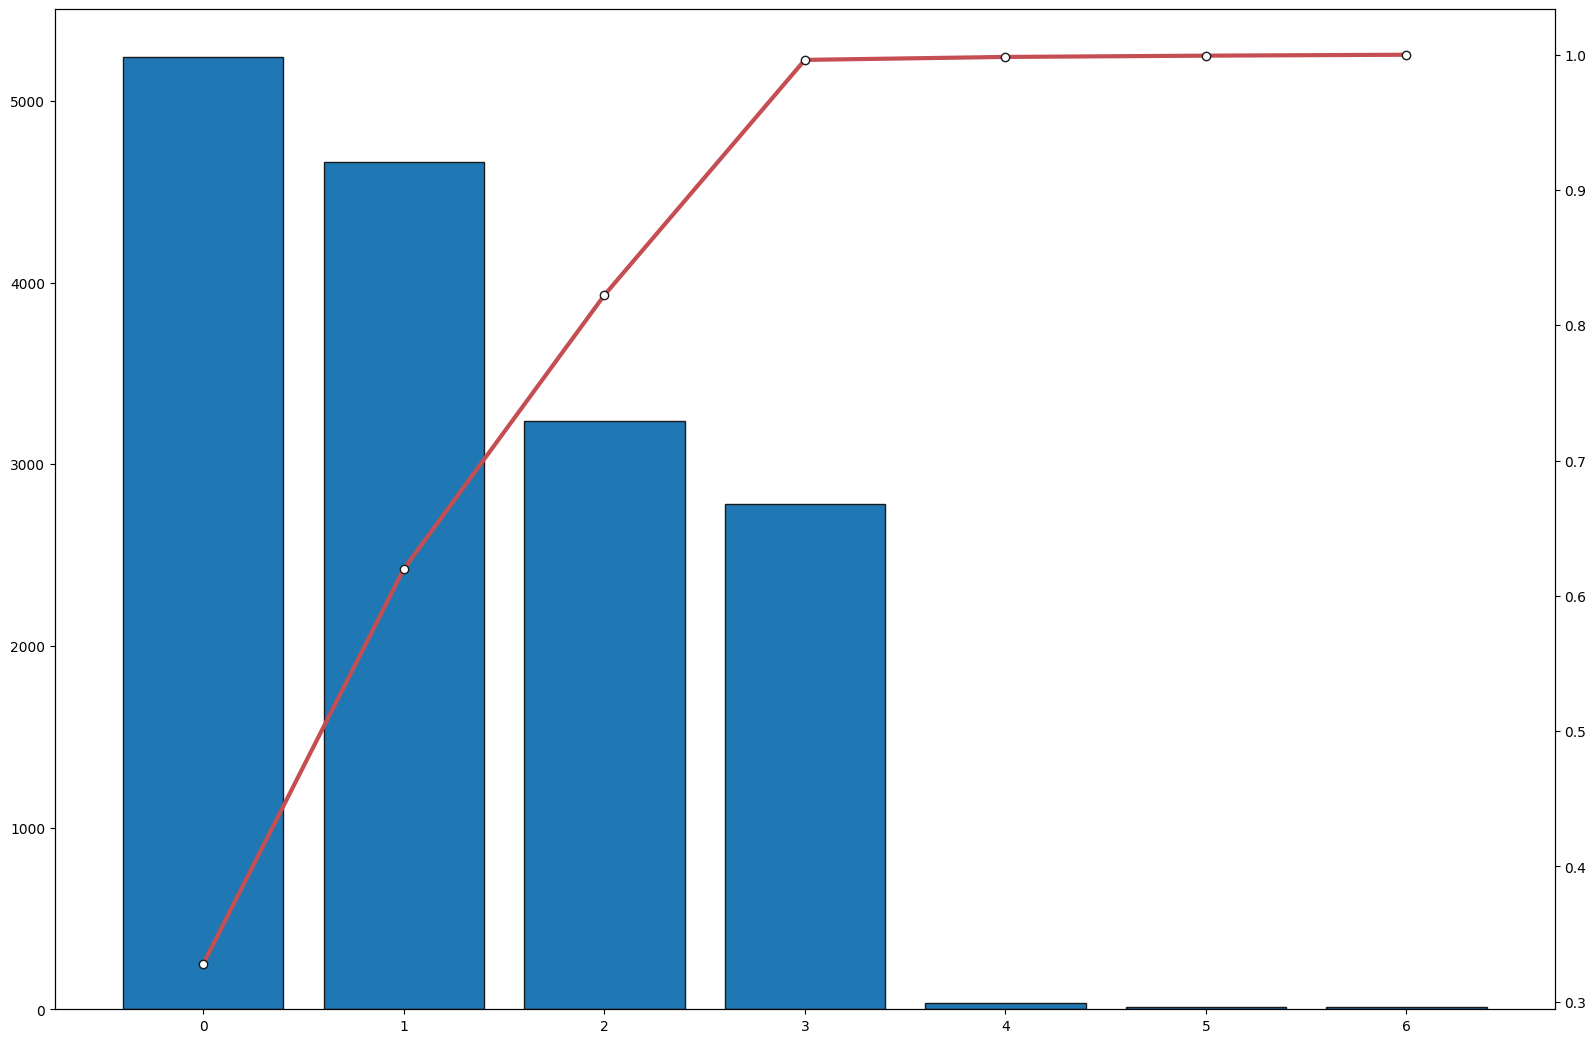

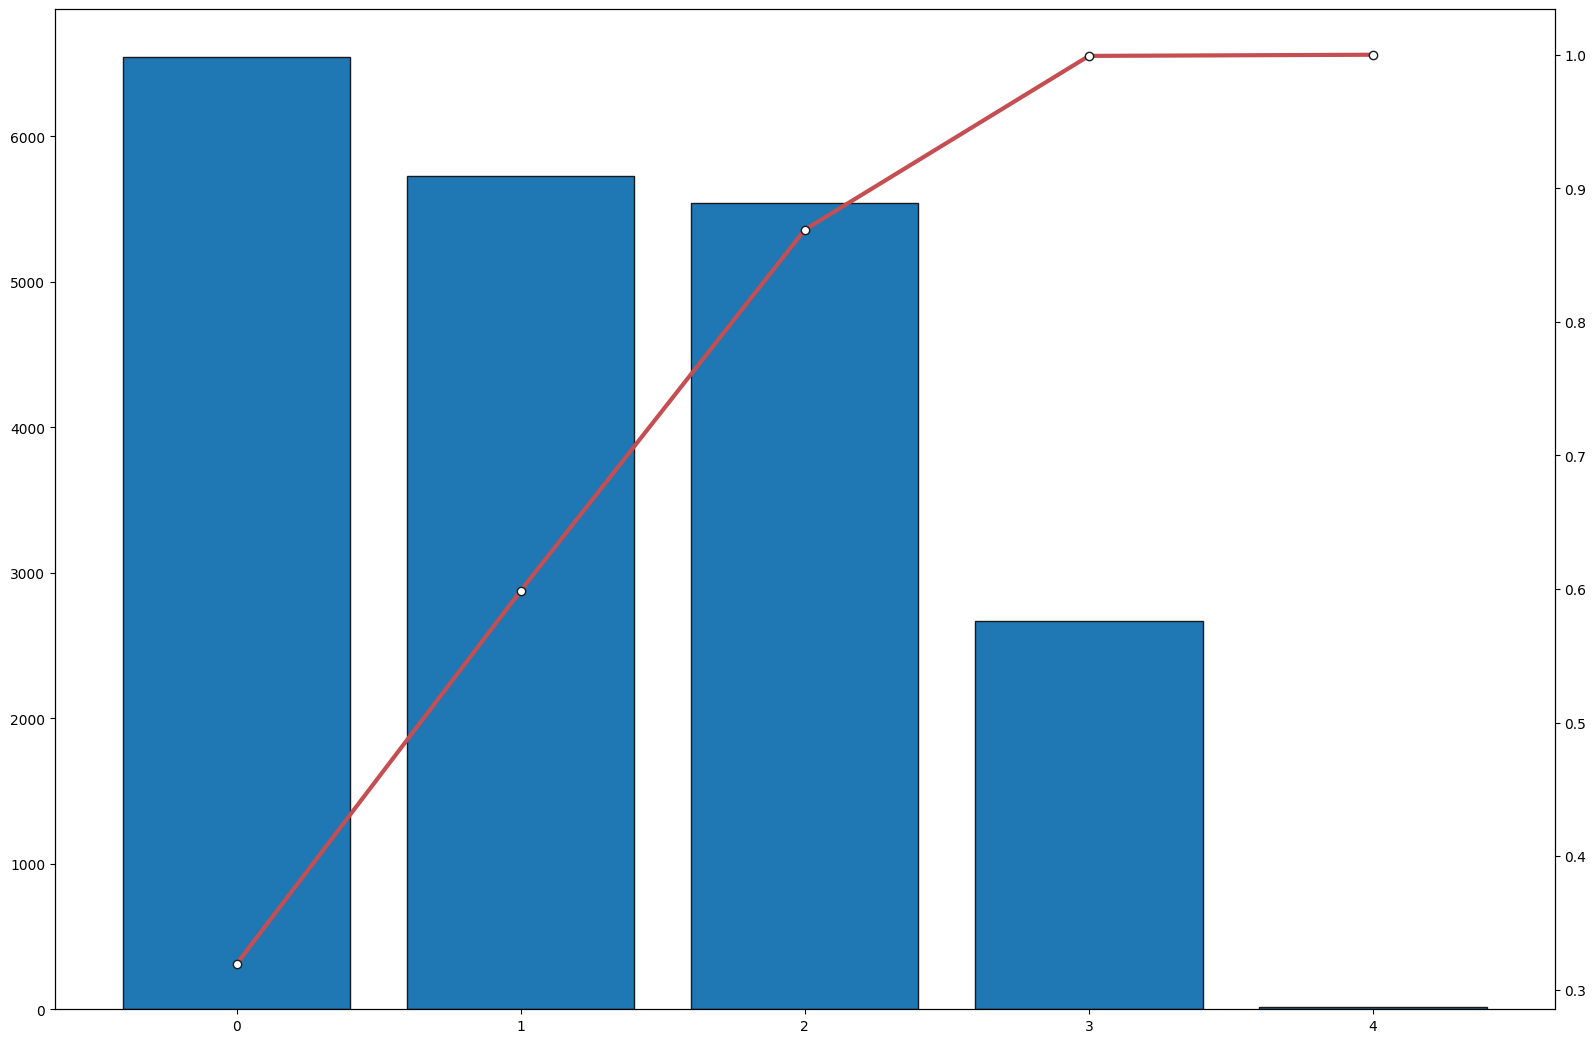

In [41]:
sns.reset_defaults()

for field_name, comms in community_lengths.items():

    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_axes([0, 0, 1, 1])

    comm_id = range(len(comms))
    sorted_comms = sorted(comms, reverse=True)
    cum_comms = list(accumulate(sorted_comms, operator.add))

    dist = np.array(cum_comms) / sum(sorted_comms)

    ax.bar(comm_id, sorted_comms, edgecolor='k')

    ax2 = ax.twinx()

    ax2.plot(
        comm_id,
        dist,
        'ro-', 
        markeredgewidth=1, 
        markeredgecolor='k',
        markerfacecolor="white", 
        linewidth=3,
    )

    plt.xticks(range(0, len(comms)))

    fig.tight_layout()

    plt.savefig(
        os.path.join(LATEX_FIGURES_PATH, 'co_occurrence_louvain_comm_dist', f'{field_name.capitalize()}.png'), 
        transparent=True, 
        dpi=150,
        bbox_inches='tight'
    )

    plt.show()

In [117]:
field_name = 'Political Science'
G = Gs[field_name]
comms = communities[field_name]

n = 20

degree = dict(G.degree(weight='weight'))
sorted_degrees = sorted(degree.items(), key=lambda tup: tup[1], reverse=True)
node_order = {n: i for i, (n, _) in enumerate(sorted_degrees)}

df = pl.DataFrame()
for i, comm in enumerate(comms):
    ordered_comm = [(n, node_order[n]) for n in comm]
    sorted_comm = sorted(ordered_comm, key=lambda tup: tup[1])
    sorted_terms = list(map(lambda tup: tup[0], sorted_comm))
    sorted_terms = sorted_terms + [None] * (n - len(sorted_terms))
    df = df.with_columns(pl.Series(f'Community {i}', sorted_terms[:n]))

In [118]:
df

Community 0,Community 1,Community 2,Community 3,Community 4,Community 5
str,str,str,str,str,str
"""policy""","""party""","""conflict""","""political""","""decision""","""model"""
"""state""","""election""","""war""","""public""","""court""","""data"""
"""european""","""voter""","""leader""","""theory""","""case""","""analysis"""
"""article""","""result""","""regime""","""politics""","""law""","""two"""
"""government""","""find""","""implication""","""social""","""justice""","""one"""
"""level""","""electoral""","""cost""","""democracy""","""supreme""","""research"""
"""economic""","""support""","""type""","""democratic""","""would""","""test"""
"""group""","""using""","""civil""","""citizen""","""judicial""","""time"""
"""national""","""show""","""strategic""","""individual""","""legal""","""empirical"""
